In [19]:
from google.colab import drive
drive.mount('/content/drive/')
import os

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
os.chdir('/content/drive/MyDrive/')

In [21]:

def split_dir_to_train_test_val(directory = "data/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil


  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
   
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

    
      rng.shuffle(list_of_files)

      
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

   
      for one_file in train_files:

    
        dest_dir = "data/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      for one_file in test_files:
      
        dest_dir = "data/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      for one_file in val_files:

        dest_dir = "data/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)
def split_dir_to_train_test_val(directory = "imageclass/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
     
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      rng.shuffle(list_of_files)

 
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      
      for one_file in train_files:

   
        dest_dir = "data/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

     
      for one_file in test_files:
       
        dest_dir = "data/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

     
      for one_file in val_files:

        dest_dir = "data/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [22]:

class_names = get_class_names_from_folder(directory="imageclass/")
class_names

array(['gore images', 'nudity images', 'voilence images',
       'vulgar sign images'], dtype='<U18')

In [23]:
len(class_names)

4

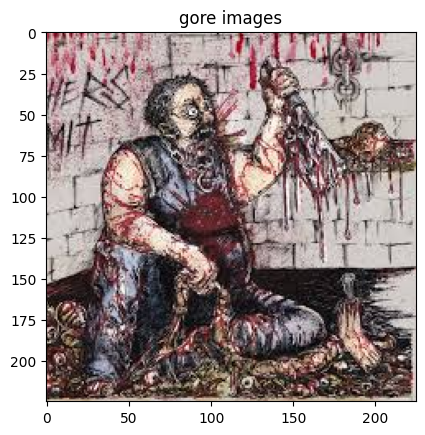

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("imageclass/", "gore images")

In [25]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="data/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="data/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="data/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 178 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [71]:

tf.random.set_seed(82)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Conv2D(10, 2, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(240, activation="relu"),
    Dense(4, activation="softmax")
])

learn = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0008,
    decay_steps=1000,
    decay_rate=0.9)



model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate = learn),
              metrics=["accuracy"])

In [72]:

history = model.fit(train_data,
                    batch_size=1,
                    epochs=20,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 [==============================] - 13s 2s/step - loss: 1.3915 - accuracy: 0.2135 - val_loss: 1.3860 - val_accuracy: 0.2500
Epoch 2/20
6/6 [==============================] - 12s 2s/step - loss: 1.3789 - accuracy: 0.2978 - val_loss: 1.3775 - val_accuracy: 0.3750
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: 1.3684 - accuracy: 0.4382 - val_loss: 1.3603 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: 1.3519 - accuracy: 0.4101 - val_loss: 1.3402 - val_accuracy: 0.4125
Epoch 5/20
6/6 [==============================] - 12s 2s/step - loss: 1.3231 - accuracy: 0.4438 - val_loss: 1.2933 - val_accuracy: 0.5375
Epoch 6/20
6/6 [==============================] - 12s 2s/step - loss: 1.2982 - accuracy: 0.4270 - val_loss: 1.3226 - val_accuracy: 0.2875
Epoch 7/20
6/6 [==============================] - 13s 2s/step - loss: 1.2563 - accuracy: 0.4551 - val_loss: 1.2589 - val_accuracy: 0.4750
Epoch 8/20
6/6 [=============================

In [73]:
model.evaluate(test_data)

2/2 [==============================] - 2s 71ms/step - loss: 1.5212 - accuracy: 0.4167


[1.521172046661377, 0.4166666567325592]

<Axes: >

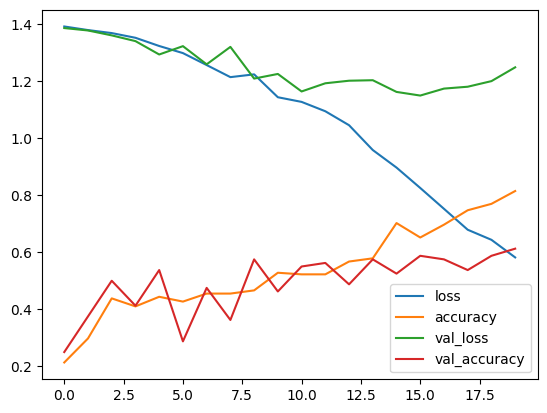

In [74]:
import pandas as pd

pd.DataFrame(history.history).plot()